#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.exceptions import ConvergenceWarning
from sklearn.datasets  import load_digits
from sklearn.linear_model import Perceptron


In [2]:
np.random.seed(42)

#### Code the solution

In [3]:
mnist = load_digits()

In [4]:

n_samples = len(mnist.images)
images = mnist.images.reshape((n_samples, -1))
labels = mnist.target
X = images

Y = labels
X = X.astype("float32")/255

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)

                                                
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((1437, 64), (1437,), (360, 64), (360,))

In [6]:
models = []
models.append(MLPClassifier(random_state = 1, max_iter=10000))
models.append(MLPClassifier(random_state = 1, max_iter=10000, hidden_layer_sizes=(400, 150, 50)))
models.append(MLPClassifier(random_state = 1, max_iter=10000, hidden_layer_sizes=(64, 32, 8)))
models.append(MLPClassifier(random_state = 1, max_iter=10000, hidden_layer_sizes=(32,16)))
models.append(MLPClassifier(random_state = 1, max_iter=10000, hidden_layer_sizes=(120, 64, 16)))
models.append(MLPClassifier(random_state = 1, max_iter=10000, hidden_layer_sizes=(320, 120, 32)))

In [7]:
np.set_printoptions(precision=2)
cross_val_scores = []
for i, model in enumerate(models):
  print("Model {0}".format(i + 1))
  cross_val_scores.append(cross_val_score(model, X_train, Y_train, cv = 5))
  print(cross_val_scores[-1])


Model 1
[0.96 0.98 0.96 0.97 0.97]
Model 2
[0.95 0.98 0.95 0.96 0.95]
Model 3
[0.93 0.96 0.92 0.92 0.94]
Model 4
[0.94 0.95 0.91 0.95 0.94]
Model 5
[0.94 0.97 0.94 0.94 0.94]
Model 6
[0.94 0.97 0.94 0.95 0.95]


In [8]:
test_accuracies = []
for model in models:
  model.fit(X_train, Y_train)
  test_accuracies.append(model.score(X_test, Y_test))

In [9]:
test_accuracies

[0.9722222222222222,
 0.9472222222222222,
 0.9388888888888889,
 0.9277777777777778,
 0.9416666666666667,
 0.95]

Text(0, 0.5, 'Value')

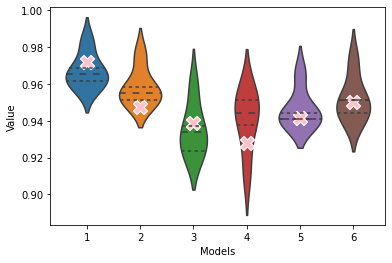

In [18]:
data = np.array(cross_val_scores)
df = pd.DataFrame(data.transpose(), columns=["1", "2", "3", "4", "5", "6"])
ax = sns.violinplot(data=df, inner="quartile")
ax = sns.scatterplot(x=[0,1,2,3,4,5], y=test_accuracies, marker="X", color="pink", s=200)
ax.set_xlabel("Models")
ax.set_ylabel("Value")